# Template for Curve Fitting

### Developed by Kevin Javier Zvonarek (Sept. 2021)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Fitted to f(x) = ax + b

a = 1.10 +/- 0.04
b = -0.26 +/- 0.26


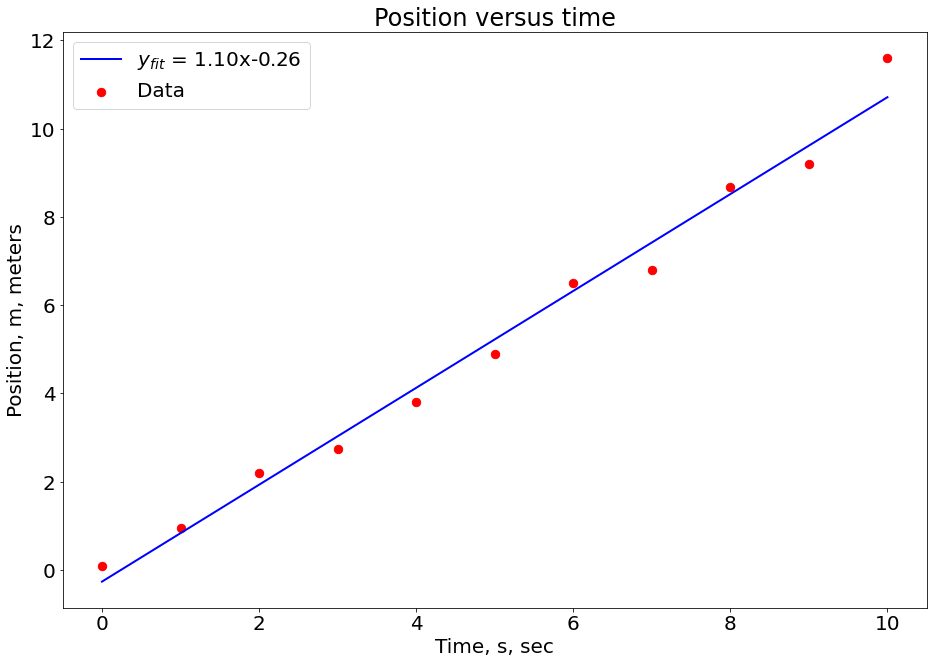

In [4]:
#Sets up the window where your plot will be displayed
#Increment counter within .figure() when making new plots
fig = plt.figure(1)
ax = fig.add_axes([0,0,2,2])

#Reads in the data from a file you previously made
df = pd.read_csv('position_vs_time.tsv',sep='\t')
y = df['Position']
x = df['Time']

#Fitted coeff and errors are printed
def func(x,a,b):
    return a*x+b
popt, pcov = curve_fit(func,x,y,[.5,.5])
print("Fitted to f(x) = ax + b\n")
for i in range(len(popt)):
    print(chr(i + 97),"=","{:.2f}".format(popt[i]), "+/-",
          "{:.2f}".format(np.sqrt(pcov[i,i])))
def fit(x):return popt[0]*x+popt[1]

#Plotting the best fit curve
plt.plot(fit(x),label="$y_{fit}$ = "+"{:.2f}x".format(popt[0])+"{:.2f} ".format(popt[1]),
         color='b',linewidth=2,linestyle='solid')

#Plotting the original data
plt.scatter(x,y,label="Data",color='r',s=70)

#General plot labels
plt.title("Position versus time")
plt.xlabel("Time, s, sec")
plt.ylabel("Position, m, meters")
plt.rcParams.update({'font.size': 20})
plt.legend(loc='best')
plt.show()

#Uncomment the line below to download a .pdf of the plot for use in report,etc. 
#The .pdf will appear in the folder this notebook resides within

fig.savefig("Plot_positon_vs_time.pdf", bbox_inches='tight')

Fitted to f(x) = ax^2

a = 1.25 +/- 0.13
b = -1.84 +/- 1.30
c = 1.68 +/- 2.80


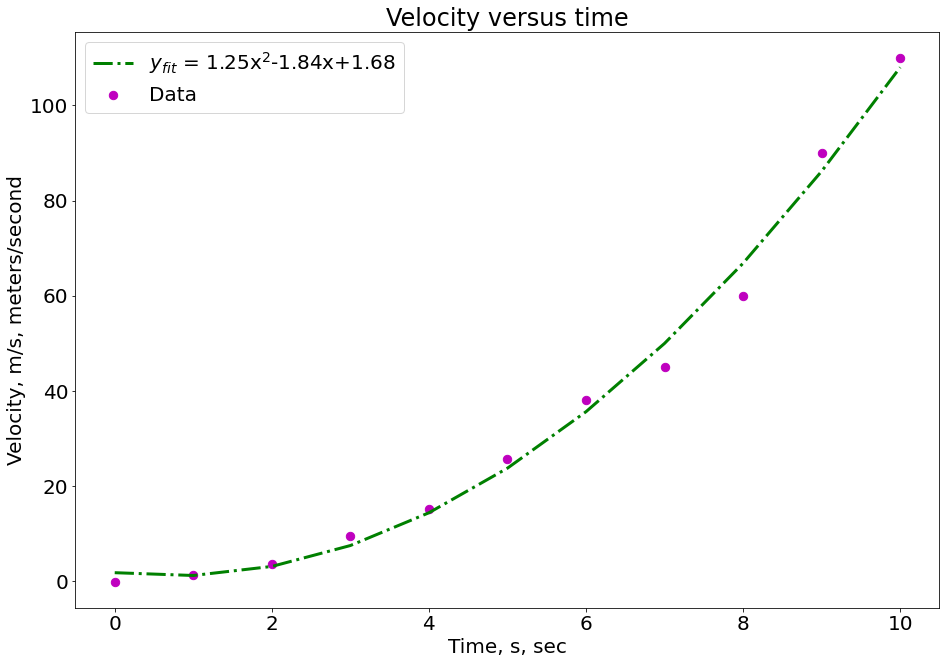

In [3]:
fig = plt.figure(2)
ax = fig.add_axes([0,0,2,2])
df = pd.read_csv('velocity_vs_time.tsv',sep='\t')
y = df['Velocity']
x = df['Time']
def func(x,a,b,c):
    return a*x**2 + b*x + c
popt, pcov = curve_fit(func,x,y,[.5,.5,.5])
print("Fitted to f(x) = ax^2\n")
for i in range(len(popt)):
    print(chr(i + 97),"=","{:.2f}".format(popt[i]), "+/-",
          "{:.2f}".format(np.sqrt(pcov[i,i])))
def fit(x):return popt[0]*x**2 + popt[1]*x + popt[2]
plt.plot(fit(x),label="$y_{fit}$ = "+"{:.2f}".format(popt[0])+"x$^2$"+"{:.2f}".format(popt[1])+"x"+"+{:.2f}".format(popt[2]),
         color='g',linewidth=3,linestyle='dashdot')
plt.scatter(x,y,label="Data",color='m',s=70)
plt.title("Velocity versus time")
plt.xlabel("Time, s, sec")
plt.ylabel("Velocity, m/s, meters/second")
plt.rcParams.update({'font.size': 20})
plt.legend(loc='best')
plt.show()
#fig.savefig("Plot_velocity_vs_time.pdf", bbox_inches='tight')